In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def ecdf(data):
    # number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    return x, y


horse_data = pd.read_csv("belmont.csv", delimiter=";")

horse_data

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,01. Mai
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,01. Mai
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,01. Mai
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,01. Mai
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,01. Mai
...,...,...,...,...,...,...,...,...
86,1930,Gallant Fox,Earl Sande,Jim Fitzsimmons,Belair Stud,2:31.60,Belmont,01. Mai
87,1929,Blue Larkspur,Mack Garner,Herbert J. Thompson,Edward R. Bradley,2:32.80,Belmont,01. Mai
88,1928,Vito,Clarence Kummer,Max Hirsch,Alfred H. Cosden,2:33.20,Belmont,01. Mai
89,1927,Chance Shot,Earl Sande,Pete Coyne,Joseph E. Widener,2:32.40,Belmont,01. Mai


Konvertiere Zeit in Sekunden

In [2]:
horse_data['Time_as_Date'] = pd.to_datetime(horse_data['Time'], format='%M:%S.%f')
horse_data['Seconds'] = horse_data['Time_as_Date'].dt.minute * 60 + horse_data['Time_as_Date'].dt.second + (
        horse_data['Time_as_Date'].dt.microsecond / 1000000)

horse_data['Seconds']

0     148.51
1     146.65
2     148.52
3     150.70
4     150.42
       ...  
86    151.60
87    152.80
88    153.20
89    152.40
90    152.20
Name: Seconds, Length: 91, dtype: float64

Finde Ausreißer mittels IQR (Percentiles)

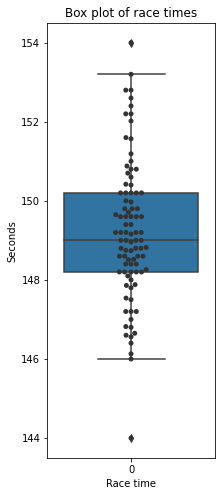

43    144.0
46    154.0
Name: Seconds, dtype: float64

In [3]:
times = horse_data['Seconds']

fig, ax = plt.subplots(figsize=(3, 8))
_ = sns.boxplot(data=times, ax=ax)
_ = sns.swarmplot(data=times, ax=ax, color=".2")
_ = ax.set_title('Box plot of race times')
_ = ax.set_xlabel('Race time')
_ = ax.set_ylabel('Seconds')
plt.show()

q1 = times.quantile(0.25)
q3 = times.quantile(0.75)
iqr = q3 - q1

outliers = times[(times < (q1 - 1.5 * iqr)) | (times > (q3 + 1.5 * iqr))]

outliers


# Aufgabe 4
Wann kann ein Pferd erwartet werden, dass die Ergebnisse von Secretariat übertrifft?

Durchschnittlich hat Secretatiat alle 29.375 Tage einen Lauf gewonnen.


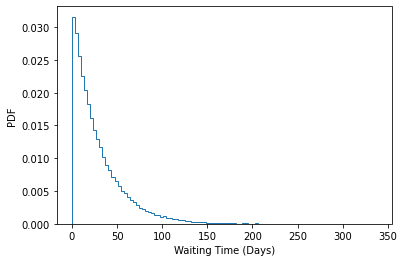

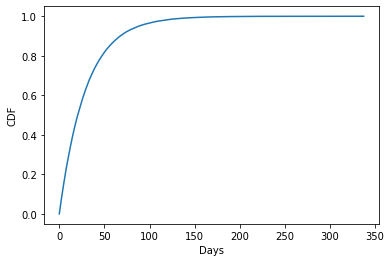

Mit einer Wahrscheinlichkeit von 95.0% wird ein Pferd Secretaritat in 88.1309104942341 Tagen schlagen.
Mit einer Wahrscheinlichkeit von 99.0% wird ein Pferd Secretaritat in 136.86084587075325 Tagen schlagen.
Mit einer Wahrscheinlichkeit von 99.9% wird ein Pferd Secretaritat in 204.27970741361872 Tagen schlagen.


In [26]:
secretariat_races = pd.read_csv("secretariat-races.csv", sep=";")
secretariat_races['Date'] = pd.to_datetime(secretariat_races["Date"], format='%m/%d/%Y')

firstplaces = secretariat_races[secretariat_races["Fin"] == "1st"]

firstplaces.sort_values(by="Date", ascending=True)
firstplaces = firstplaces.reset_index()

sumOfDaysBetweenRaces = 0

for index, time in firstplaces['Date'].items():
    if index == 0:
        continue

    sumOfDaysBetweenRaces += (time - firstplaces['Date'][index - 1]).days

# Calculate the mean of days between won races
meanDaysBetweenWonRaces = np.abs(sumOfDaysBetweenRaces / len(firstplaces))

print(f'Durchschnittlich hat Secretatiat alle {meanDaysBetweenWonRaces} Tage einen Lauf gewonnen.')

waitingTimeUntilNextWinInDays = np.random.exponential(meanDaysBetweenWonRaces, size=100000)

_ = plt.hist(waitingTimeUntilNextWinInDays, bins=100, histtype='step', density=True)
_ = plt.xlabel('Waiting Time (Days)')
_ = plt.ylabel('PDF')
plt.show()

def cdf(df):
    """Cumulative distribution function."""
    sq = df.value_counts()
    return sq.sort_index().cumsum()*1./len(sq)

cd = cdf(pd.DataFrame(waitingTimeUntilNextWinInDays))
_ = plt.plot(cd.index.tolist(), cd.tolist())
_ = plt.ylabel("CDF")
_ = plt.xlabel("Days")
plt.show()

print(f'Mit einer Wahrscheinlichkeit von 95.0% wird ein Pferd Secretaritat in {cd[cd.gt(0.95)].index[0][0]} Tagen schlagen.')
print(f'Mit einer Wahrscheinlichkeit von 99.0% wird ein Pferd Secretaritat in {cd[cd.gt(0.99)].index[0][0]} Tagen schlagen.')
print(f'Mit einer Wahrscheinlichkeit von 99.9% wird ein Pferd Secretaritat in {cd[cd.gt(0.999)].index[0][0]} Tagen schlagen.')



Konfidenzintervall der Varianz für Rainbow-Daten
